In [4]:
# import decision trees scikit-learn libraries
%matplotlib inline
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt

!conda install python-graphviz --yes
import graphviz

from sklearn.tree import export_graphviz

import itertools

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python-graphviz-0.13.2     |             py_0          24 KB

The following NEW packages will be INSTALLED:

    python-graphviz: 0.13.2-py_0


python-graphviz-0.13 | 24 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [5]:
import pandas as pd # import library to read data into dataframe
pd.set_option('display.max_columns', None)
import numpy as np # import numpy library

In [6]:
spambase = pd.read_csv("https://www.openml.org/data/get_csv/44/dataset_44_spambase.arff")

print("Data read into dataframe!") # takes about 30 seconds

Data read into dataframe!


# Dividing Data into Spam and Non Spam E-mail Categories

In [7]:
df = pd.DataFrame(spambase)
#print(f_result['class'])
not_spam = df.loc[df['class'] == 0]
spam = df.loc[df['class'] == 1]

# Selecting a subset from the Spam and Non-Spam dataframes

In [144]:
# select subset of not_spam
from sklearn import preprocessing
from sklearn import utils
s_traits = spam[(["word_freq_money", "word_freq_free", "word_freq_credit", "word_freq_business", "char_freq_%21"])]
s = s_traits["word_freq_money"]
ns = s_traits.iloc[:,1:]
lab_enc = preprocessing.LabelEncoder()
encoded_s = lab_enc.fit_transform(s)
lab_enc_ns = preprocessing.LabelEncoder()
encoded_ns = lab_enc_ns.fit_transform(ns["word_freq_free"])
mail_tree = tree.DecisionTreeClassifier(max_depth=3)
mail_tree.fit(ns,encoded_s)
print("Decision tree model saved to mail_tree!")

Decision tree model saved to mail_tree!


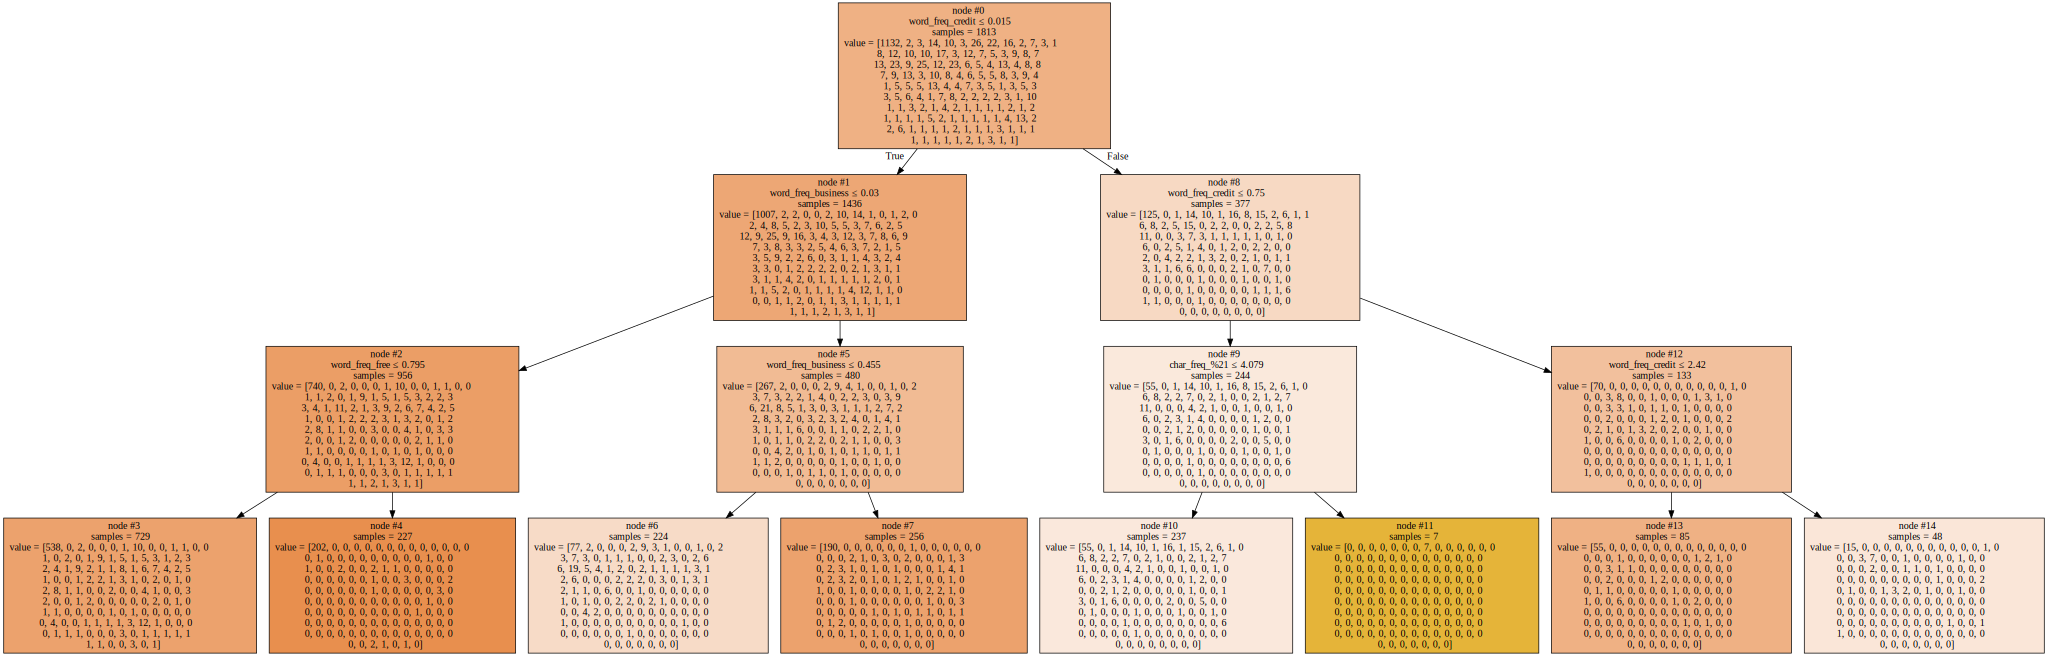

In [147]:
export_graphviz(mail_tree,
                feature_names=list(ns.columns.values),
                out_file="mail_tree.dot",
                filled=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel=False)

with open("mail_tree.dot") as mail_train_tree_image:
   mail_train_tree_graph = mail_train_tree_image.read()
graphviz.Source(mail_train_tree_graph)